<a href="https://colab.research.google.com/github/innocentgodson/KNN-Customer-segmentation-model---Classification/blob/main/Customer_segmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Nearest Neighbors**

*   Use K Nearest neighbors to classify data

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point.

What is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

**About the dataset**

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital status, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

**Step -1 Import libraries**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


**Step 2 - Load and read in the data**

In [110]:
path="/content/drive/MyDrive/BellsDataset/Telecoms dataset/teleCust1000t.csv"

df=pd.read_csv(path)

df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


**Data Visualization and Analysis**

Let’s see how many of each class is in our data set

In [111]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


**You can easily explore your data using visualization techniques:**

**We can plot each of these features:**

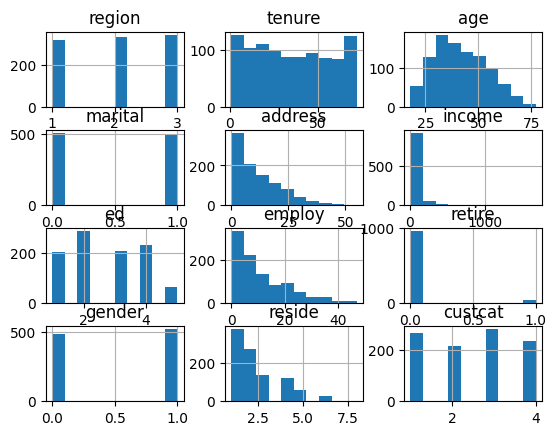

In [112]:
viz = df[['region', 'tenure',	'age', 'marital',	'address',	'income',	'ed',	'employ',	'retire',	'gender',	'reside', 'custcat']]
viz.hist()
plt.show()

**Feature set**

Let's define feature sets, X:

In [113]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

**Step 3a - Define Features**

In [114]:
X = df.drop('custcat', axis=1)

In [115]:
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


**Step 3b - Define Target**

In [116]:
y = df['custcat']

In [117]:
y.head()

,custcat
0,1
1,4
2,3
3,1
4,3


**Step 4 - Train/Test Split**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


**Inspect and verify that your test features and test labels are correctly aligned row-by-row.**

In [119]:
pd.concat([X_test.head(), y_test.head()], axis=1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
521,1,48,41,0,21,43.0,2,7,0.0,0,1,2
737,1,15,38,1,11,46.0,5,11,0.0,0,3,1
740,3,34,29,0,5,26.0,3,4,0.0,1,2,2
660,2,45,54,0,25,171.0,3,33,0.0,1,1,3
411,3,5,31,0,1,21.0,3,1,0.0,1,2,1


**Best Practice - Rename the target column for clarity:**

In [120]:
pd.concat([X_test.head(10), y_test.rename('Actual').head(10)], axis=1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,Actual
521,1,48,41,0,21,43.0,2,7,0.0,0,1,2
737,1,15,38,1,11,46.0,5,11,0.0,0,3,1
740,3,34,29,0,5,26.0,3,4,0.0,1,2,2
660,2,45,54,0,25,171.0,3,33,0.0,1,1,3
411,3,5,31,0,1,21.0,3,1,0.0,1,2,1
678,1,19,27,1,3,35.0,2,4,0.0,0,6,4
626,2,16,27,0,5,41.0,4,2,0.0,1,1,4
513,1,38,40,0,15,34.0,2,11,0.0,1,1,2
859,3,7,31,1,12,31.0,2,7,0.0,1,6,1
136,2,40,38,0,17,96.0,4,0,0.0,1,1,1


**Quick index alignment check (MOST IMPORTANT)**

In [121]:
X_test.index.equals(y_test.index) # True = perfectly aligned , False = index mismatch (serious issue)

True

**Find mismatched indices explicitly**

In [122]:
X_test.index.difference(y_test.index) # If this returns anything other than an empty Index, you have a problem.

Index([], dtype='int64')

**Step 5 - Feature Scaling** - Data Standardization

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-0.0076287  -1.0556246  -0.69241001 ... -0.20742414  0.98757716
  -0.2497985 ]
 [ 1.21296321 -0.20521933 -0.61085406 ... -0.20742414  0.98757716
   1.14280639]
 [-1.22822061  1.7318149   2.73293988 ...  4.82103975  0.98757716
  -0.94610095]
 ...
 [ 1.21296321 -0.72491144 -0.12151837 ... -0.20742414  0.98757716
  -0.94610095]
 [ 1.21296321  0.45620699 -0.93707786 ... -0.20742414 -1.01257911
   1.14280639]
 [-0.0076287  -1.10286934 -1.42641356 ... -0.20742414 -1.01257911
  -0.94610095]]


**When scaling is NOT needed**

**You do not need standardization for:**

*   Decision Trees
*   Random Forest
*   Gradient Boosting

**You DO need it for:**

*   KNN
*   SVM
*   Logistic Regression
*   Linear Regression
*   Neural Networks












**Step 6 - Train the KNN model**

In [124]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

**Step 7 - Make predictions**

We can use the model to make predictions on the test set:

In [125]:
y_pred = knn.predict(X_test_scaled)

**Printing the predicted output**

In [126]:
print(y_pred[:5])

[2 2 3 3 3]


**Comparing the actual vs predicted output**

In [127]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison.head(20)

,Actual,Predicted
521,2,2
737,1,2
740,2,3
660,3,3
411,1,3
678,4,3
626,4,4
513,2,3
859,1,1
136,1,4


**Detect misalignment after predictions**

In [128]:
y_pred = pd.Series(y_pred, index=y_test.index, name='Predicted')

**Then check:**

In [129]:
y_test.index.equals(y_pred.index)

True

**Step 8 - Evaluate the knn model**

**8a. Classification report**

In [130]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.38      0.50      0.43        60
           2       0.23      0.26      0.24        39
           3       0.35      0.33      0.34        55
           4       0.33      0.20      0.25        46

    accuracy                           0.34       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.34      0.33       200



**8b. Confusion Matrix**

In [131]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[30 11 14  5]
 [13 10  9  7]
 [18 13 18  6]
 [17  9 11  9]]


### **How to create confusion matrices and compute metrics with Python**

In this guided project, we will demonstrate how these evaluation metrics are computed and interpreted to assess the effectiveness of the classification model.

A telecom company wanted to know its future customers better. They already had 4 customer groups based on service usage:

*   Basic Service
*   E-Service
*   Plus Service
*   Total Service

But here's the twist:
Instead of waiting months to observe how a new customer behaves, they built a K-Nearest Neighbour model that tries to predict the group using demographics — region, age, and marital status etc.

So the model makes guesses.
And just like in school, guesses need to be graded.

That's where the confusion matrix comes in — the model's report card.

Each row is the customer's real group.
Each column is the group the model predicted.

The diagonal is when the model got it right — like saying a student is excellent and they truly are.

Everything off the diagonal are the mix-ups — like assuming someone streams a lot of data, but they barely use the internet.

**Let's zoom into the Basic Service group.**

True Positive (TP): The model predicted Basic, and the customer was truly Basic.

False Negative (FN): Customers who were actually Basic, but the model underestimated them and placed them in other groups.

False Positive (FP): Customers from other groups, who the model mistakenly upgraded to Basic — offers sent to the wrong people.

True Negative (TN): Customers who were not Basic, and the model correctly said, “they don't belong here.”

**Business Insight Moment**

If FN is high, the company is missing real customers for premium upgrades.

If FP is high, the company is wasting money sending the wrong offers.

The confusion matrix doesn't just say how accurate the model is — it tells you where it fails, who it misjudges, and how to fix it.
_________________________________________________________________________

**Key Terminologies:**

**Confusion matrices** are one of several evaluation metrics that are used to measure the performance of a classification model in machine learning.

The confusion matrix is a table with 4 different values (True Positive (TP), False Positive (FP), True Negative (TN) and False Negative (FN)) that are combinations of predicted and actual values. These four different values make it easy to calculate common measures like recall, precision, or accuracy.

It compares:

*   the actual (true) labels in your dataset vs

*   the predicted labels produced by your model.

This lets you see not just how many predictions were correct, but what kinds of errors the model is making.

A false positive result is also called a type I error and a false negative result is also called a type II error.

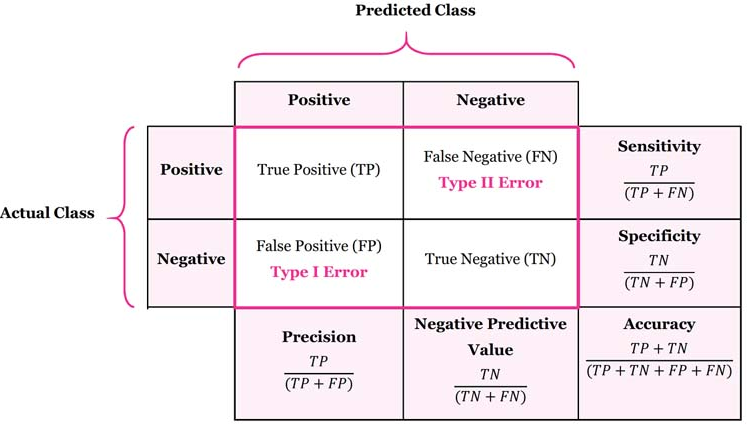

There are many applications of the confusion matrix accross different fields. In Natural Language Processing (NLP), NLP models use matrices to evaluate models for sentiment analysis and text classification. In medical diagnosis, confusion matrices helps quantify the accuracy of diagnostic tests. Other fields include fradu detection, customer churn prediction, or A/B testing.

Confusion matrices can be used with any classifier algorithm, such as Naïve Bayes, logistic regression models, and decision trees. Because of their wide applicability in data science and machine learning models, many packages and libraries come preinstalled with functions for creating confusion matrices, such as the sklearn.metrics module in scikit-learn for Python.

**Sensitivity:** Sensitivity measures the model's ability to correctly identify spam, this is also called the true positive rate. In our context, it reveals how many actual spam emails were correctly labeled as spam. A high sensitivity means fewer malicious emails slip through undetected, enhancing customer security.

**Specificity:** Specificity gauges the model for correctly identifying non-spam messages. This is also called the true negative rate. It showcases how many legitimate emails were accurately classified as such.

**Accuracy:** Accuracy is the overall correctness of the model's classifications, measuring both true positives and true negatives. It quantifies how often the model makes the correct decision.

**Precision:** Precision delves into the accuracy of positive predictions, focusing on the proportion of correctly classified spam emails out of all emails flagged as spam.

**Visualize confusion matrix**

Python’s print command provides a basic confusion matrix for rudimentary model evaluation. But sometimes, you might want a more robust confusion matrix with labels. The scikit-learn metrics module contains the ConfusionMatrixDisplay function, which you can use to create a more detailed matrix and define labels. The following example shows the code for visualizing the confusion matrix using sklearn and the pyplot module.

In [132]:
# define confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[30 11 14  5]
 [13 10  9  7]
 [18 13 18  6]
 [17  9 11  9]]


In [133]:
# Manually define the 4-class confusion matrix from the image
cm = np.array([
    [30, 11, 14, 5],
    [13, 10, 9,  7],
    [18, 13, 18, 6],
    [17, 9,  11, 9]
])

In [134]:
# Labels for your 4 classes (generic classroom-friendly labels)
labels = ["Class 1", "Class 2", "Class 3", "Class 4"]

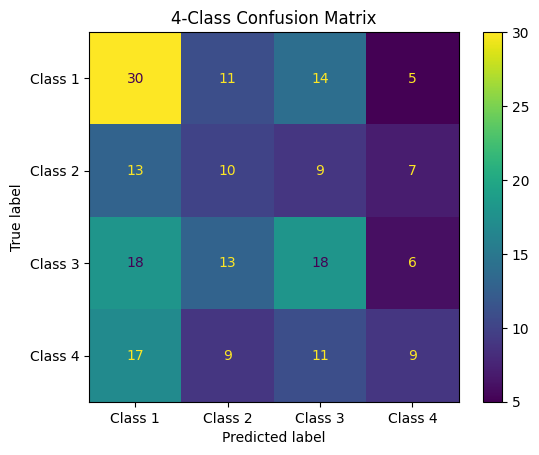

In [135]:
# Visualize the composite confusion matrix for all classes - Fig 1
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.title("4-Class Confusion Matrix")
plt.show()

In [136]:
total = cm.sum()

for i in range(4):
    TP = cm[i, i]
    FN = cm[i].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = total - (TP + FP + FN)

    print(f"{labels[i]} → TP={TP}, FP={FP}, TN={TN}, FN={FN}")


Class 1 → TP=30, FP=48, TN=92, FN=30
Class 2 → TP=10, FP=33, TN=128, FN=29
Class 3 → TP=18, FP=34, TN=111, FN=37
Class 4 → TP=9, FP=18, TN=136, FN=37


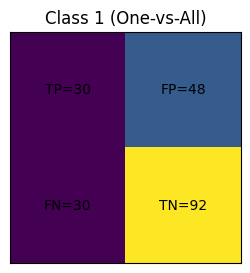

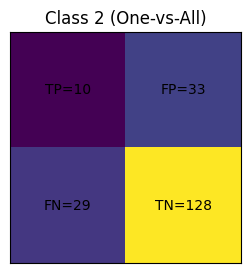

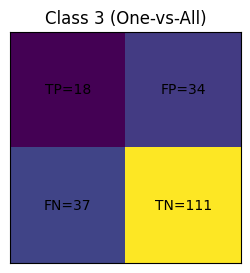

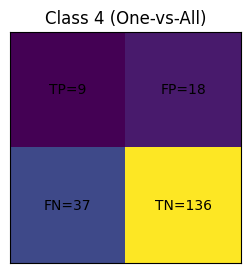

In [137]:
# Now generate 4 separate 2×2 plots with TP, FP, TN, FN written on the image
for i in range(4):
    TP = cm[i, i]
    FN = cm[i].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = total - (TP + FP + FN)

    ova = np.array([[TP, FP], [FN, TN]])

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(ova)

    # Write metric names and values onto the image
    ax.text(0, 0, f"TP={TP}", ha='center', va='center')
    ax.text(1, 0, f"FP={FP}", ha='center', va='center')
    ax.text(0, 1, f"FN={FN}", ha='center', va='center')
    ax.text(1, 1, f"TN={TN}", ha='center', va='center')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(f"{labels[i]} (One-vs-All)")
    plt.show()


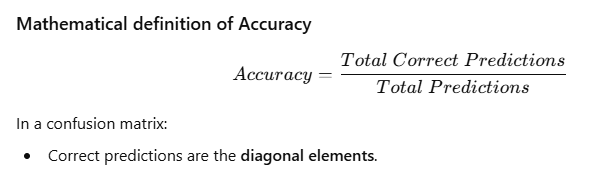


**Accuracy = (TP + TN) / (TP + TN + FP + FN))**

Note: The first formula for accuracy is valid for a 4-class model while the second one is for binary (2-class) classification.

In [138]:
67 / 200 # Accuracy of the model = 0.34

0.335

###### Determining the metrics for Class 1, where:

**Class 1 → TP=30, FP=48, TN=92, FN=30**

**Precision = TP/(TP + FP)**

In [139]:
30/(30+48)

0.38461538461538464

**Recall = Sensitivity = TP / (TP+FN)**

In [140]:
30/(30 + 30)

0.5

**Specificity = TN / (TN+FP)**

In [141]:
92/(92+48)

0.6571428571428571

**F1 Score** = 2 * (Precision * Recall)/(Precision + Recall)

In [142]:
2 * ((0.38*0.5)/(0.38+0.5))

0.4318181818181818

**Support = TP + FN**

Where TP = 30 and FN = 30

In [143]:
30 + 30

60

**Summary - Building a Confusion Matrix**

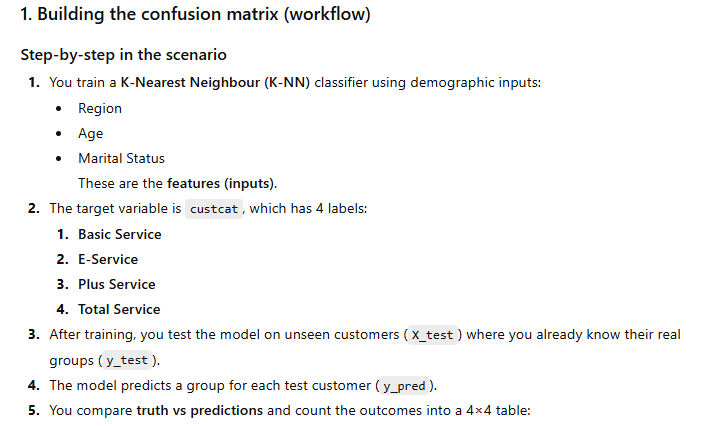

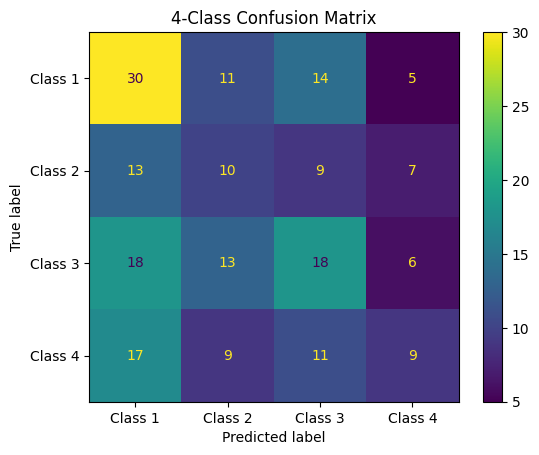

**1. Meaning of the Matrix structure in our context using the 4-class matrix above**

**Rows = Actual (True) customer groups**

Each row represents customers who truly belongs to that group after analysis.

*   Row 1 = customers who are actually Basic Service
*   Row 2 = actually E-Service
*   Row 3 = actually Plus Service
*   Row 4 = actually Total Service

So, row = ground truth

**Columns = Model's predicted groups**

Each column represents customers the model believes belong to that group based on demographics.

*   Column 1 = predicted as Basic Service
*   Column 2 = predicted as E-Service
*   Column 3 = predicted as Plus Service
*   Column 4 = predicted as Total Service

So, column = model guess.

**Diagonal = Correct classifications**

These are customers where:

**Actual Group = Predicted Group**

Meaning: the model guessed correctly.

In our case:

*   30 Basic customers correctly identified
*   10 E-Service customers correctly identified
*   18 Plus customers correctly identified
*   9 Total Service customers correctly identified

These are the model's True Positives when evaluated per class (One-vs-All), and they also form the correct predictions used in accuracy.

**Off-Diagonal = Mistakes (confusions)**

These are the errors.

Example from the scenario:

11 Basic customers were predicted as E-Service → model thought they used digital services based on demographics, but they actually prefer Basic.

7 E-Service customers were predicted as Total Service → model assumed highest usage, but that was wrong.

Off-diagonal values show which groups are being mixed up.

**TP, FP, TN, FN per class (One-vs-All meaning)**

Since this is multi-class, we treat one customer group at a time as the target, and all other 3 groups become “Not that group”.

We compute:

[ TP  FP ]

[ FN  TN ]